# Hoja de trabajo 2 - Norman Vicente

In [97]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

## Problema I

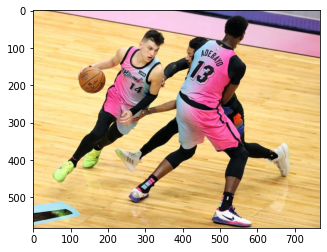

In [4]:
imagen = cv2.imread('herro.jpeg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)

In [29]:
def binarize(img):
  thresh = 128
  im_gray = np.array(Image.open(img).convert('L'))
  maxval = 255
  im_bin = (im_gray > thresh) * maxval
  Image.fromarray(np.uint8(im_bin)).save('herro_gray.jpeg')
  imagen = cv2.imread('herro_gray.jpeg')
  plt.imshow(imagen)

### Salida:

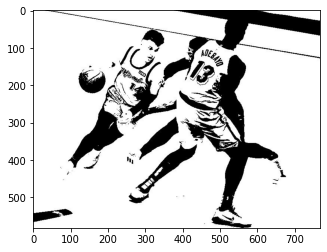

In [30]:
binarize("herro.jpeg")

## Problema II

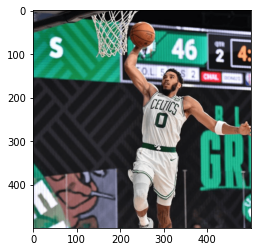

In [32]:
im1 = cv2.imread('tatum.png')
im2 = cv2.imread("curry.jpg")
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
plt.imshow(im1)

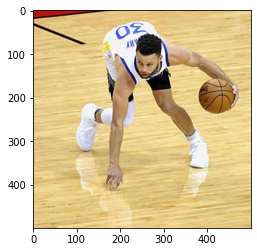

In [33]:
plt.imshow(im2)

In [50]:
def image_operations(op):

  _, im_th = cv2.threshold(im1, 128, 255, cv2.THRESH_BINARY)
  _, im_th = cv2.threshold(im2, 128, 255, cv2.THRESH_BINARY)

  im1np = np.array(im1)*255
  im2np = np.array(im2)*255

  if op == 1:
    #suma
      result = im1np + im2np
      result[result > 256] = 256
  elif op == 2:
    #resta
    result = im1np - im2np
  elif op == 3:
    #and
    result = np.bitwise_and(im1np, im2np).astype(np.uint8)
  elif op == 4:
    #xor
    result = np.bitwise_xor(im1np, im2np).astype(np.uint8)
  elif op == 5:
    #or
    result = np.bitwise_or(im1np, im2np).astype(np.uint8)
  else:
    print('error')

  return result



### Salida:

### OR

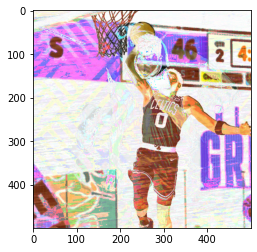

In [40]:
result = image_operations(5)
Image.fromarray(result).save('or_img.png')
imagen = cv2.imread('or_img.png')
plt.imshow(imagen)

## XOR

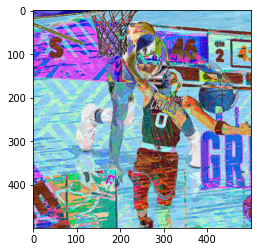

In [42]:
result = image_operations(4)
Image.fromarray(result).save('xor_img.png')
imagen = cv2.imread('xor_img.png')
plt.imshow(imagen)

## AND

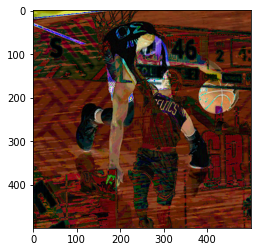

In [43]:
result = image_operations(3)
Image.fromarray(result).save('and_img.png')
imagen = cv2.imread('and_img.png')
plt.imshow(imagen)

### SUMA

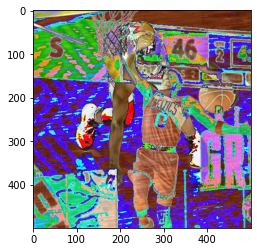

In [49]:
result = image_operations(1)
Image.fromarray(result).save('and_img.png')
imagen = cv2.imread('and_img.png')
plt.imshow(imagen)

### RESTA

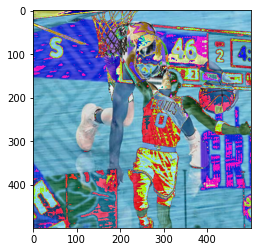

In [51]:
result = image_operations(2)
Image.fromarray(result).save('and_img.png')
imagen = cv2.imread('and_img.png')
plt.imshow(imagen)

## Problema III

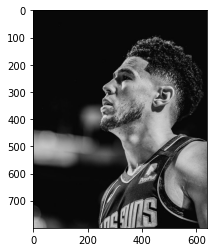

In [130]:
img_gray = cv2.imread("booker.jpeg" ,0)
img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
plt.imshow(img_gray)

### Salida:

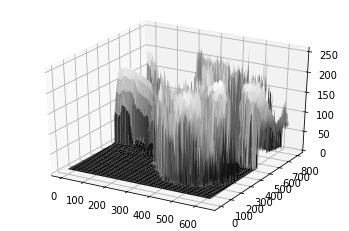

In [129]:
Y = np.arange(0, np.shape(img_gray)[0], 1)
X = np.arange(0, np.shape(img_gray)[1], 1)
X, Y = np.meshgrid(X, Y)
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, img_gray, cmap="gray") 
plt.show()

## Problema IV

In [90]:
def image_transformations(op, img):


  if op == 1:
    #log
    c = 255/(np.log(1 + np.max(img)))
    log_transformed = c * np.log(1 + img)
    log_transformed = np.array(log_transformed, dtype = np.uint8)
    cv2.imwrite('log.jpg', log_transformed)
  elif op == 2:
    #exponencial
    c = 255/(np.exp(1 + np.max(img)))
    exp_transformed = c * np.exp(1 + img)
    exp_transformed = np.array(exp_transformed, dtype = np.uint8)
    cv2.imwrite('exp.jpg', exp_transformed)
  elif op == 3:
    #negativa
    neg = 255 - img
    cv2.imwrite('neg.jpg', neg)
  elif op == 4:
    #lineal
    linear = 255+ img
    cv2.imwrite('linear.jpg', linear)
  else:
    print('error')


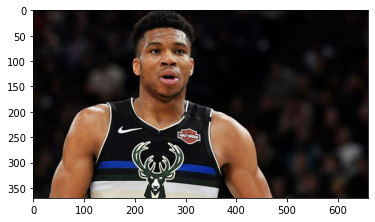

In [73]:
img = cv2.imread('anteto.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Salida:

### Log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


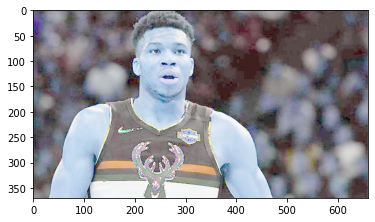

In [79]:
image_transformations(1, img)
imglog = cv2.imread('log.jpg')
imglog = cv2.cvtColor(imglog, cv2.COLOR_BGR2RGB)
plt.imshow(imglog)

## Linear

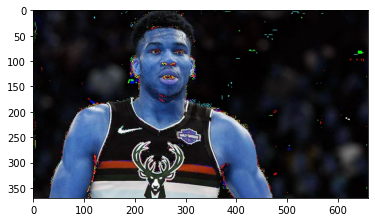

In [78]:
image_transformations(4, img)
imgl = cv2.imread('linear.jpg')
imgl = cv2.cvtColor(imgl, cv2.COLOR_BGR2RGB)
plt.imshow(imgl)

### Negativa

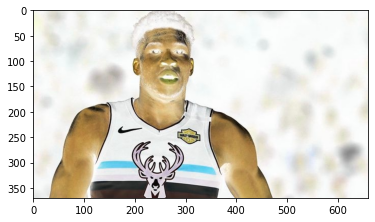

In [77]:
image_transformations(3, img)
imgneg = cv2.imread('neg.jpg')
imgneg = cv2.cvtColor(imgneg, cv2.COLOR_BGR2RGB)
plt.imshow(imgneg)

## Problema V

In [95]:
def filter(img):
  img_src = img

  #Kernel para deteccion de bordes
  kernel = np.array([[0.0, -1.0, 0.0], 
                    [-1.0, 4.0, -1.0],
                    [0.0, -1.0, 0.0]])

  kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)
  img_rst = cv2.filter2D(img_src,-1,kernel)
  cv2.imwrite('filter.jpg',img_rst)

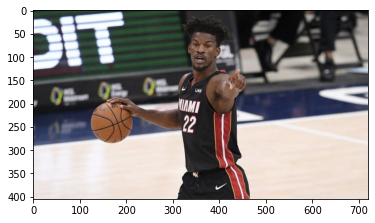

In [93]:
imgf = cv2.imread('butler.jpeg')
imgf = cv2.cvtColor(imgf, cv2.COLOR_BGR2RGB)
plt.imshow(imgf)

### Salida: Kernel para deteccion de bordes

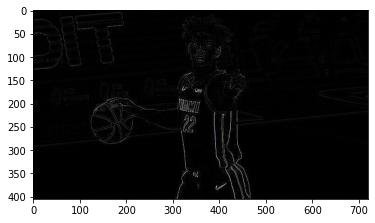

In [96]:
Çfilter(imgf)
imgl = cv2.imread('filter.jpg')
imgl = cv2.cvtColor(imgl, cv2.COLOR_BGR2RGB)
plt.imshow(imgl)